# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: Linear Regression with Gradient Descent

## Learning Objectives

At the end of the mini project, you will be able to

* understand Optimization, apply optimization algorithms
* Understand the intuition behind ordinay least squares (OLS) linear regression. How is the best fit found? How do you actually implement gradient descent?
* Loading and looking at data and implementing
  - Cost function 
  - Gradient descent variants

**Packages used:**  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` and `Seaborn` for visualization
*  `sklearn` for the metrics and pre-processing


### Dataset Description

The dataset chosen for this mini project is [California Housing Price Data Set](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) with 20640 instances each having 9 attributes.

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are self explanatory:

* longitude

* latitude

* housing_median_age

* total_rooms

* total_bedrooms

* population

* households

* median_income

* median_house_value

* ocean_proximity

## Grading = 10 Points

### Download the data

In [ ]:
#@title Load the dataset
# !wget -qq https://cdn.extras.talentsprint.com/ADSMI/Datasets/California_housing.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import random

**Exercise 1**: Load the data and perform the following (2 points)
- Exploratory Data Analysis 
- Preprocessing 


**Hints:** 

- checking for the number of rows and columns
- summary of the dataset
- statistical description of the features 
- check for the duplicate values
- Show the top 5 and the last 5 rows of the data
- check for the null values, and handle them if *any*

In [ ]:
# YOUR CODE HERE

house_price_data = pd.read_csv('California_housing.csv')
house_price_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
house_price_data.shape #checking for the number of rows and columns

(20640, 9)

In [ ]:
house_price_data.info() #summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   Housing_Value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
house_price_data.describe() #statistical description of the features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
#check for the duplicate values
house_price_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [ ]:
print(house_price_data.duplicated().value_counts()) #count of duplicated values if any

False    20640
dtype: int64


In [ ]:
house_price_data.head() #top 5 rows of the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
house_price_data.tail() #last 5 rows of the data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housing_Value
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
#check of the null values
house_price_data.isnull().values.any()

False

In [ ]:
house_price_data.isnull().value_counts() #count null values if any

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  Housing_Value
False   False     False     False      False       False     False     False      False            20640
dtype: int64

In [ ]:
#Handle null values in case any
# dropna()
# fillna(pad, bfill)
# replace()
# interpolate()

**Exercise 2**: Data Visualization (1 point)

- Visualize the Latitude and Longitude using the Population as size
- Plot the distribution of all the variables as histograms
- Correlations between variables as heatmap
- Analyze the results between target and other features (Hint: *Pair plot*)

C:\Users\Admin\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


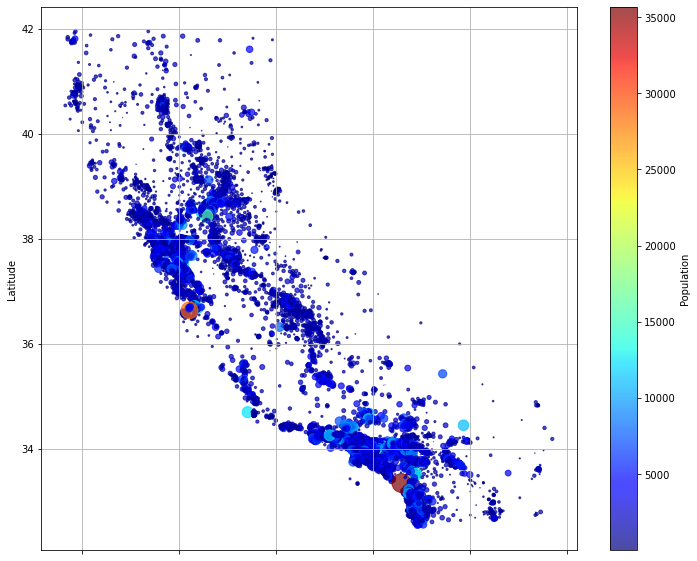

In [ ]:
#Visualize the Latitude and Longitude using the Population as size

house_price_data.plot(kind="scatter", 
                      x="Longitude", 
                      y="Latitude", 
                      alpha=0.7, 
                      s=house_price_data['Population']/100,
                      c="Population", 
                      cmap=plt.get_cmap("jet"), 
                      figsize=(12,10))
plt.grid(True)

In [ ]:
#Plot the distribution of all the variables as histograms

C:\Users\Admin\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


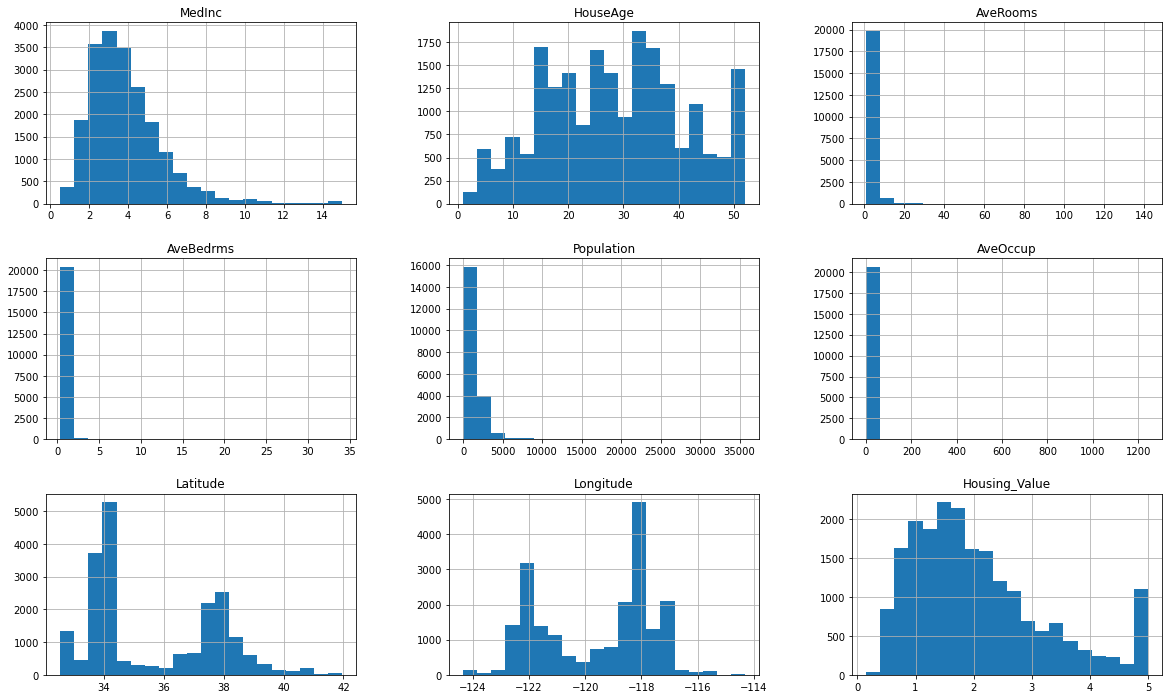

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
axs = house_price_data.hist(bins=20, ax=ax)

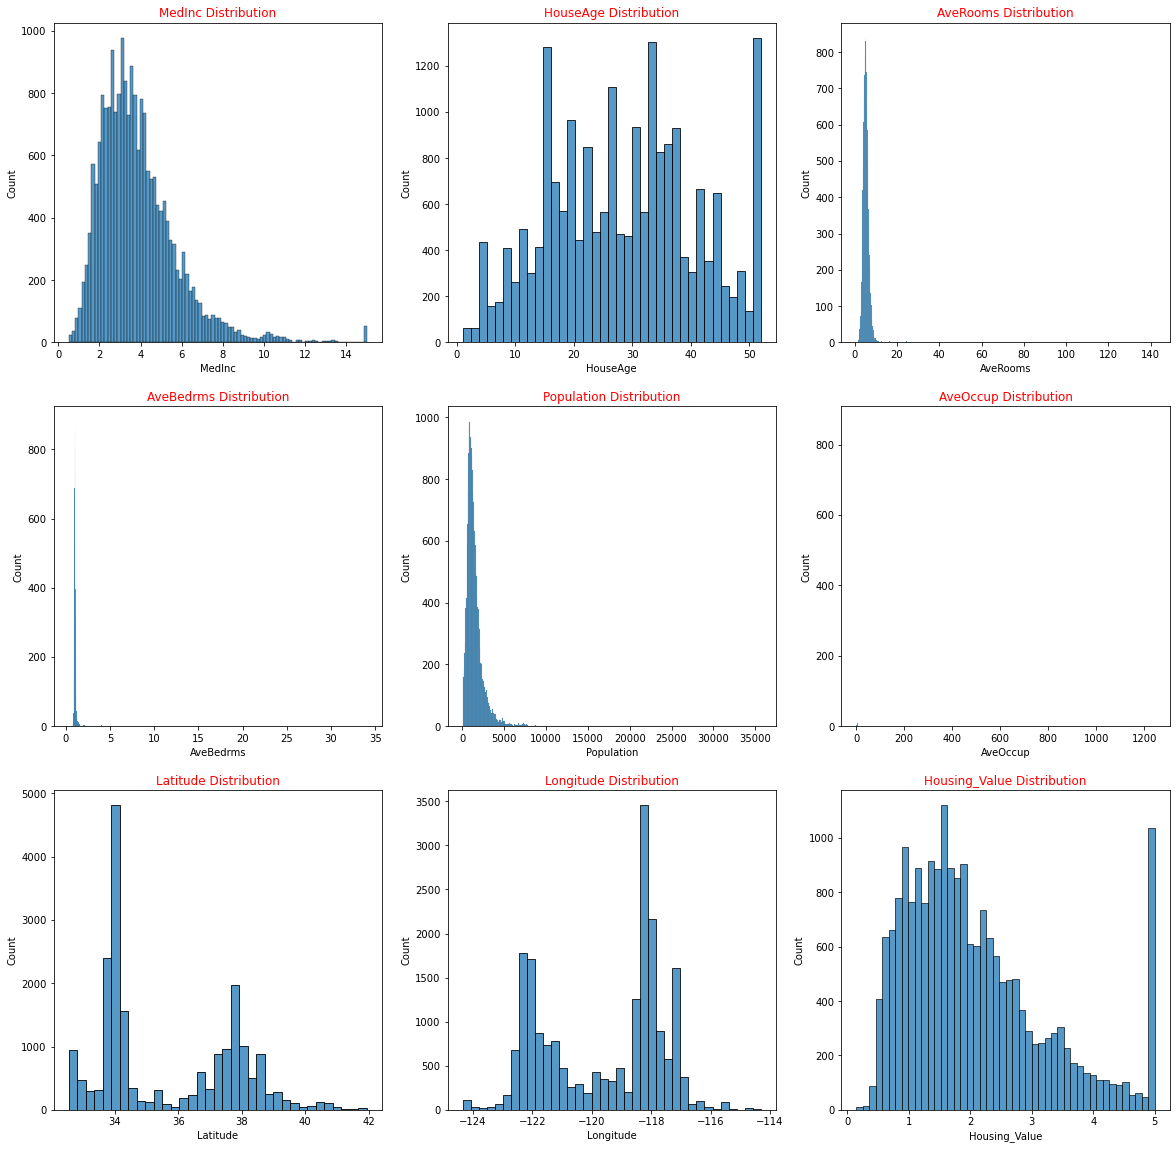

In [ ]:
fig=plt.figure(figsize=(20,20))
for i, feature in enumerate(house_price_data.columns):
    ax=fig.add_subplot(nrows,nrows,i+1)
    sns.histplot(house_price_data[feature])
    ax.set_title(feature+" Distribution",color='red')

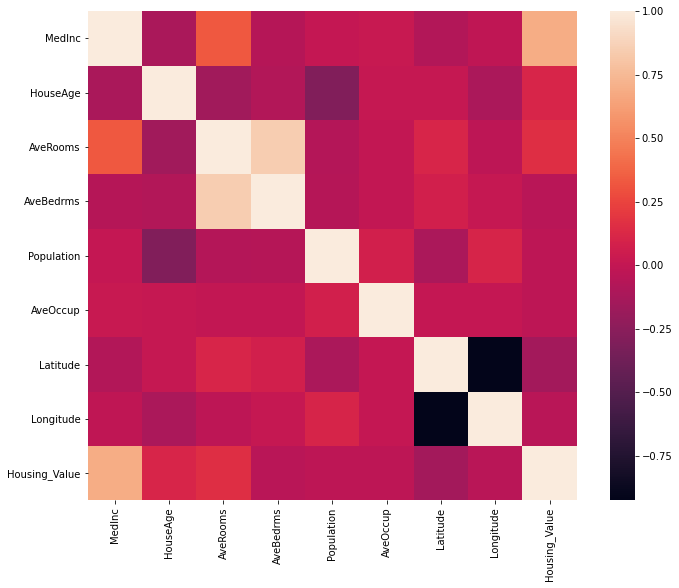

In [ ]:
#Correlations between variables as heatmap
corrmat = house_price_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

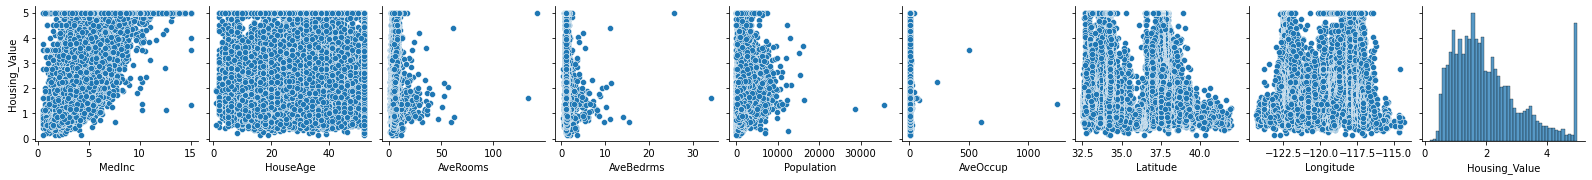

In [ ]:
#Analyze the results between target and other features (Hint: Pair plot)
sns.pairplot(house_price_data, y_vars='Housing_Value')

**Exercise 3:** Data Preparation (1 Point)

 - Create new features:

    - Create possible new features based on the existing data
  
      For eg. `bedrooms per room` = AveBedrms / AveRooms

- Identify the `features`, `target` from the given set of attributes and split the data into train, test

- Normalization

  **Hint:**: `StandardScaler` or `MinMaxScaler`



In [ ]:
#  Create new features
house_price_data['bedrooms_per_room'] = house_price_data['AveBedrms'] / house_price_data['AveRooms']

In [ ]:
#Identify the features, target from the given set of attributes 
target = house_price_data['Housing_Value']
inputs = house_price_data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']]

In [ ]:
#split the data into train, test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, random_state=42)

In [ ]:
#normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

### Find the best fit line using

- Gradient descent
- Mini batch gradient
- Stochastic gradient descent

### Gradient Descent for Multiple Linear Regression


The idea behind gradient descent is by gradually tuning parameters, such as slope (m) and the intercept (b) in our regression function $y = mx + b$, Minimize cost of a function that tells how far off model predicted result. For regression problems use mean squared error (MSE) cost function.

$$ MSE = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2 \quad \textrm{where} \quad \hat{y_i} = mx_i + b $$
Now, Figure out how to tweak parameters m and b to reduce MSE.

**Partial Derivatives**

Use partial derivatives to find how each individual parameter affects MSE. Take the derivative with respect to m and b separately. Take a look at the formula below. It looks almost exactly the same as MSE, but this time add f(m, b) to it. then plug m and b numbers into it and calculate the result.

$$𝑓(𝑚,𝑏)= \frac{1}{n}\sum_{i=1}^{n}(y_i - (mx_i+b))^2$$
This function is better representation for further calculations of partial derivatives.

**Partial Derivative With Respect to m**

With respect to m means we derive parameter m and ignore what is going on with b, or it is 0. To derive with respect to m we will use chain rule.

$$ [f(g(x))]' = f'(g(x)) * g(x)' \: - \textrm{chain rule}$$
Chain rule applies when one function sits inside of another. Lets write these steps down:

$$ (y - (mx + b))^2 $$
1. Derivative of $(f)^2$ is $2(f)$, same as $x^2$ becomes $2x$
2. We do nothing with $y - (mx + b)$, so it stays the same
3. Derivative of $y - (mx + b)$ with respect to m is $(0 - (x + 0))$ or $-x$, because y and b are constants, they become 0, and derivative of mx is x

Multiply all parts we get following: $2 * (y - (mx+b)) * -x$. if we move -x to the left: $-2x *(y-(mx+b))$. The final version of our derivative is the following:

$$\frac{\partial f}{\partial m} = \frac{1}{n}\sum_{i=1}^{n}-2x_i(y_i - (mx_i+b))$$
Here, $\frac{df}{dm}$ means we find partial derivative of function f (we mentioned it earlier) with respect to m.

**Partial Derivative With Respect to b**

Same rules apply to the derivative with respect to b.

  $y - (mx + b)$ becomes $(0 - (0 + 1))$ or $-1$, because y and mx are constants, they become 0, and derivative of b is 1

Multiply all the parts together and we get $-2(y-(mx+b))$

$$\frac{\partial f}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}-2(y_i - (mx_i+b))$$

**Final Function**

1. Gradient descent is an iterative process and with each iteration (epoch) we slightly minimizing MSE, so each time we use our derived functions to update parameters m and b
2. Because its iterative, we should choose how many iterations we take, or make algorithm stop when we approach minima of MSE. In other words when algorithm is no longer improving MSE, we know it reached minimum.
3. Gradient descent has an additional parameter learning rate (lr), which helps control how fast or slow algorithm going towards minima of MSE
Thats about it. So you can already understand that Gradient Descent for the most part is just process of taking derivatives and using them over and over to minimize function.

**Exercise 4:** Find the best fit line using Gradient descent and visualize the results (2 points)

**Hints:**
       
- write a function to return predicted(y), when inputs are : x, weight and intercept 
- write a function to return linear loss, when inputs are : y_true and y_predicted
- write a function to return derivative of loss w.r.t weight, when inputs are : x, y_true, and y_predicted
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- write a function to perform gradient descent, when inputs are : x and y
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- use all the above functions to predict, display the results and the accuracy

Read this [article](https://medium.com/analytics-vidhya/implementing-gradient-descent-for-multi-linear-regression-from-scratch-3e31c114ae12) for more information

In [ ]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product btween weight and input
    return np.array(y_lst)

In [ ]:
def linear_loss(y, yhat):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-yhat[i])**2
    return (1/n)*s

In [ ]:
def derivative_loss_wrt_weight(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

def derivative_loss_wrt_bias(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [ ]:
def gradient_descent(x, y, epochs):
    loss = []
    loss_dict = {}
    weights_dict = {}
    bias_dict = {}
    rng = np.random.default_rng()
    weight_vector = rng.standard_normal(x.shape[1])
    intercept = 0.0
    learning_rate = [0.55]
    for lr in learning_rate:
        
        for i in tqdm(range(epochs)):
            y_predicted = predicted_y(weight_vector, x, intercept)
            weight_vector -= lr * derivative_loss_wrt_weight(x, y, y_predicted)
            intercept -= lr * derivative_loss_wrt_bias(y,y_predicted)    #update bias
            loss.append(linear_loss(y, y_predicted))
        weights_dict[lr] = weight_vector
        bias_dict[lr] = intercept
        loss_dict[lr] = loss
    return weight_vector, intercept, loss

In [ ]:
m, c, loss = gradient_descent(x_train, y_train, 1000)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:42<00:00,  9.74it/s]


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_test_hat = predicted_y(m, x_test, c)

In [ ]:
r2_score(y_test, y_test_hat)

0.5946703135360327

In [ ]:
mean_squared_error(y_test, y_test_hat)

0.5363395795878785

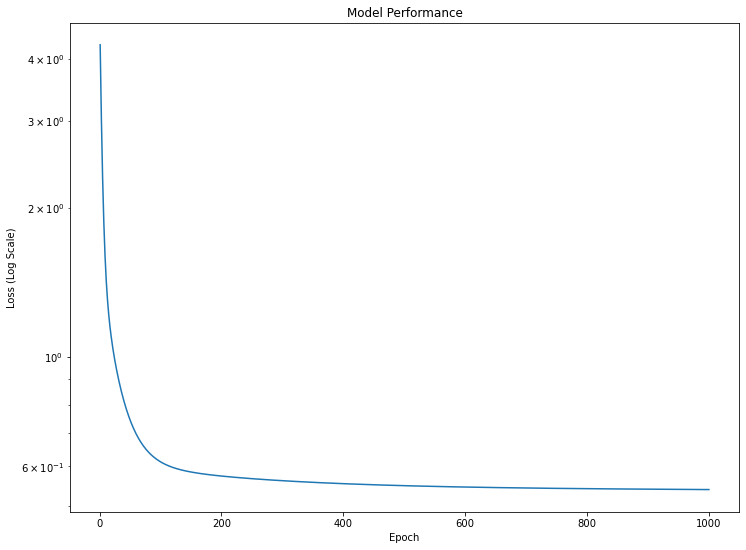

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.lineplot(x=np.arange(1, len(loss) + 1), y=loss, ax=ax)

ax.set(
    title='Model Performance',
    xlabel='Epoch',
    ylabel='Loss (Log Scale)',
    yscale='log',
)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(x_train, y_train)
sk_model.intercept_
sk_model.score(x_test, y_test)

0.5910509795491351

**Exercise 5:** Find the best fit line using SGD for Multiple Linear Regression and visualize the results (2 points)

**Hints:**
       
- write a function to return predicted(y), when inputs are : x, weight and intercept 
- write a function to return linear loss, when inputs are : y_true and y_predicted
- write a function to return derivative of loss w.r.t weight, when inputs are : x, y_true, and y_predicted
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- write a function to perform Stochastic gradient descent, when inputs are : x and y
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- use all the above functions to predict, display the results and the accuracy



In [ ]:
def predicted_y(weight,x,intercept):
    return weight@x+intercept

In [ ]:
def linear_loss(y, yhat):
    n=x_train.shape[0]
    s=(y-yhat)**2
    return (1/n)*s

In [ ]:
def derivative_loss_wrt_weight(x,y,y_predicted):
    n = x_train.shape[0]
    s=-x*(y-y_predicted)
    return (2/n)*s

def derivative_loss_wrt_bias(y,y_predicted):
    n= x_train.shape[0]
    s=-(y-y_predicted)
    return (2/n) * s

In [ ]:
def sgd(x, y, epochs):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    learning_rate = 0.55
    loss = []
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    for i in tqdm(range(epochs)):
        for idx in random_idx:
            pred = predicted_y(weight_vector, x[idx], intercept)
            weight_vector -= learning_rate * derivative_loss_wrt_weight(x[idx], y[idx], pred)
            intercept -= learning_rate * derivative_loss_wrt_bias(y[idx],pred)    #update bias
        loss.append(linear_loss(y[idx], pred))
    return weight_vector, intercept, loss

In [ ]:
m, c, loss =  sgd(x_train, y_train, 500)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [01:06<00:00,  7.48it/s]


In [ ]:
def predict(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product btween weight and input
    return np.array(y_lst)

In [ ]:
y_test_hat = predict(m, x_test, c)

In [ ]:
r2_score(y_test, y_test_hat)

0.5851917856505939

In [ ]:
mean_squared_error(y_test, y_test_hat)

0.548881739293815

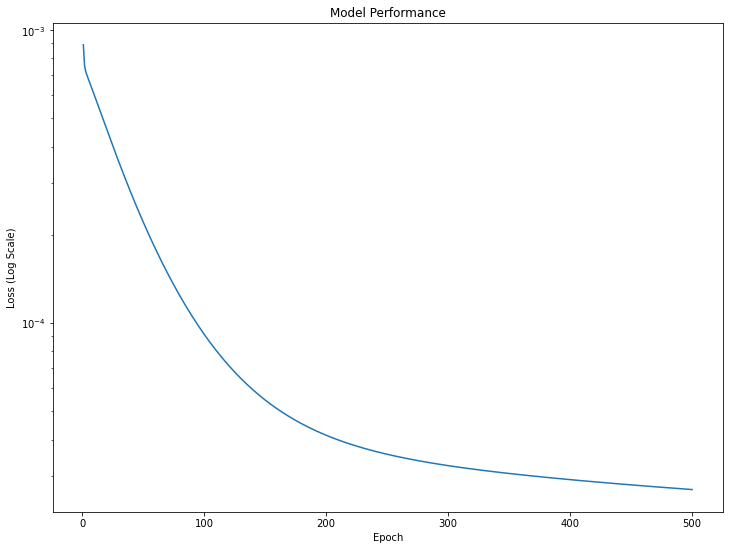

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.lineplot(x=np.arange(1, len(loss) + 1), y=loss, ax=ax)
ax.set(
    title='Model Performance',
    xlabel='Epoch',
    ylabel='Loss (Log Scale)',
    yscale='log',
)
plt.show()

In [ ]:
#Compare my r2 score with sklearn's result

In [ ]:
from sklearn.linear_model import SGDRegressor
sk_model = SGDRegressor()
sk_model.fit(x_train, y_train)
sk_model.intercept_
sk_model.score(x_test, y_test)

0.5638949993927722

**Exercise 6:** Find the best fit line using Mini Batch Gradient Descent for Multiple Linear Regression and visualize the results (2 points)

**Hints:**
       
- write a function to return predicted(y), when inputs are : x, weight and intercept 
- write a function to return linear loss, when inputs are : y_true and y_predicted
- write a function to return derivative of loss w.r.t weight, when inputs are : x, y_true, and y_predicted
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- write a function to perform mini-batch gradient descent, when inputs are : x and y
- write a function to return derivative of loss w.r.t bias, when inputs are : y_true, and y_predicted
- use all the above functions to predict, display the results and the accuracy



In [ ]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product btween weight and input
    return np.array(y_lst)

In [ ]:
def linear_loss(y, yhat):
    loss =mean_squared_error(y, yhat)
    return loss

In [ ]:
def derivative_loss_wrt_weight(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

def derivative_loss_wrt_bias(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

In [ ]:
def minibatch(x, y, epochs, batch_size):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    learning_rate = 0.55
    loss = []
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    for i in tqdm(range(epochs)):
        loss = []
        for i in range(int(len(random_idx)/batch_size)):
            idx = np.random.choice(len(random_idx), size=batch_size, replace=False)
            pred = predicted_y(weight_vector, x[idx], intercept)
            weight_vector -= learning_rate * derivative_loss_wrt_weight(x[idx], y[idx], pred)
            intercept -= learning_rate * derivative_loss_wrt_bias(y[idx],pred)    #update bias
            loss.append(linear_loss(y[idx], pred))
    return weight_vector, intercept, loss

In [ ]:
m, c, l = minibatch(x_train, y_train, 1000, 4)

 12%|█████████▌                                                                     | 121/1000 [05:42<40:38,  2.77s/it]

In [ ]:
def predict(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product btween weight and input
    return np.array(y_lst)

In [ ]:
y_test_hat = predict(m, x_test, c)

In [ ]:
r2_score(y_test, y_test_hat)

0.5185761993032851

In [ ]:
mean_squared_error(y_test, y_test_hat)

0.6370286892179771

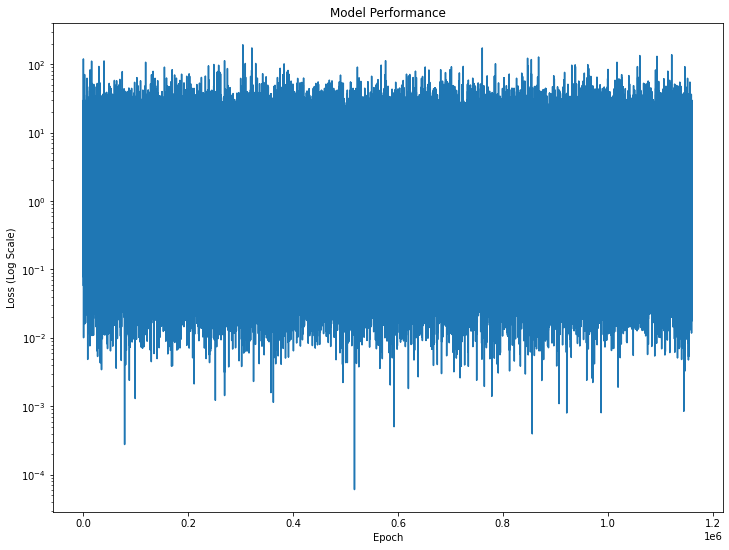

In [ ]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.lineplot(x=np.arange(1, len(l) + 1), y=l, ax=ax)
ax.set(
    title='Model Performance',
    xlabel='Epoch',
    ylabel='Loss (Log Scale)',
    yscale='log',
)
plt.show()

### Report Analysis

* Report in what is the step size (ETA) for gradient descent
* Discuss about finding the local minima
* Discuss the Linear structure of the data and features used in fitting the best fit line.